In [ ]:

About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location 
for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this:          
 

Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & 
all other variable will be independent in the analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Company_Data.csv')

In [3]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
#Rename the column
data.rename({'CompPrice':'Compe_price','ShelveLoc':'Self_loc'},axis=1,inplace=True)

In [5]:
data

,Sales,Compe_price,Income,Advertising,Population,Price,Self_loc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


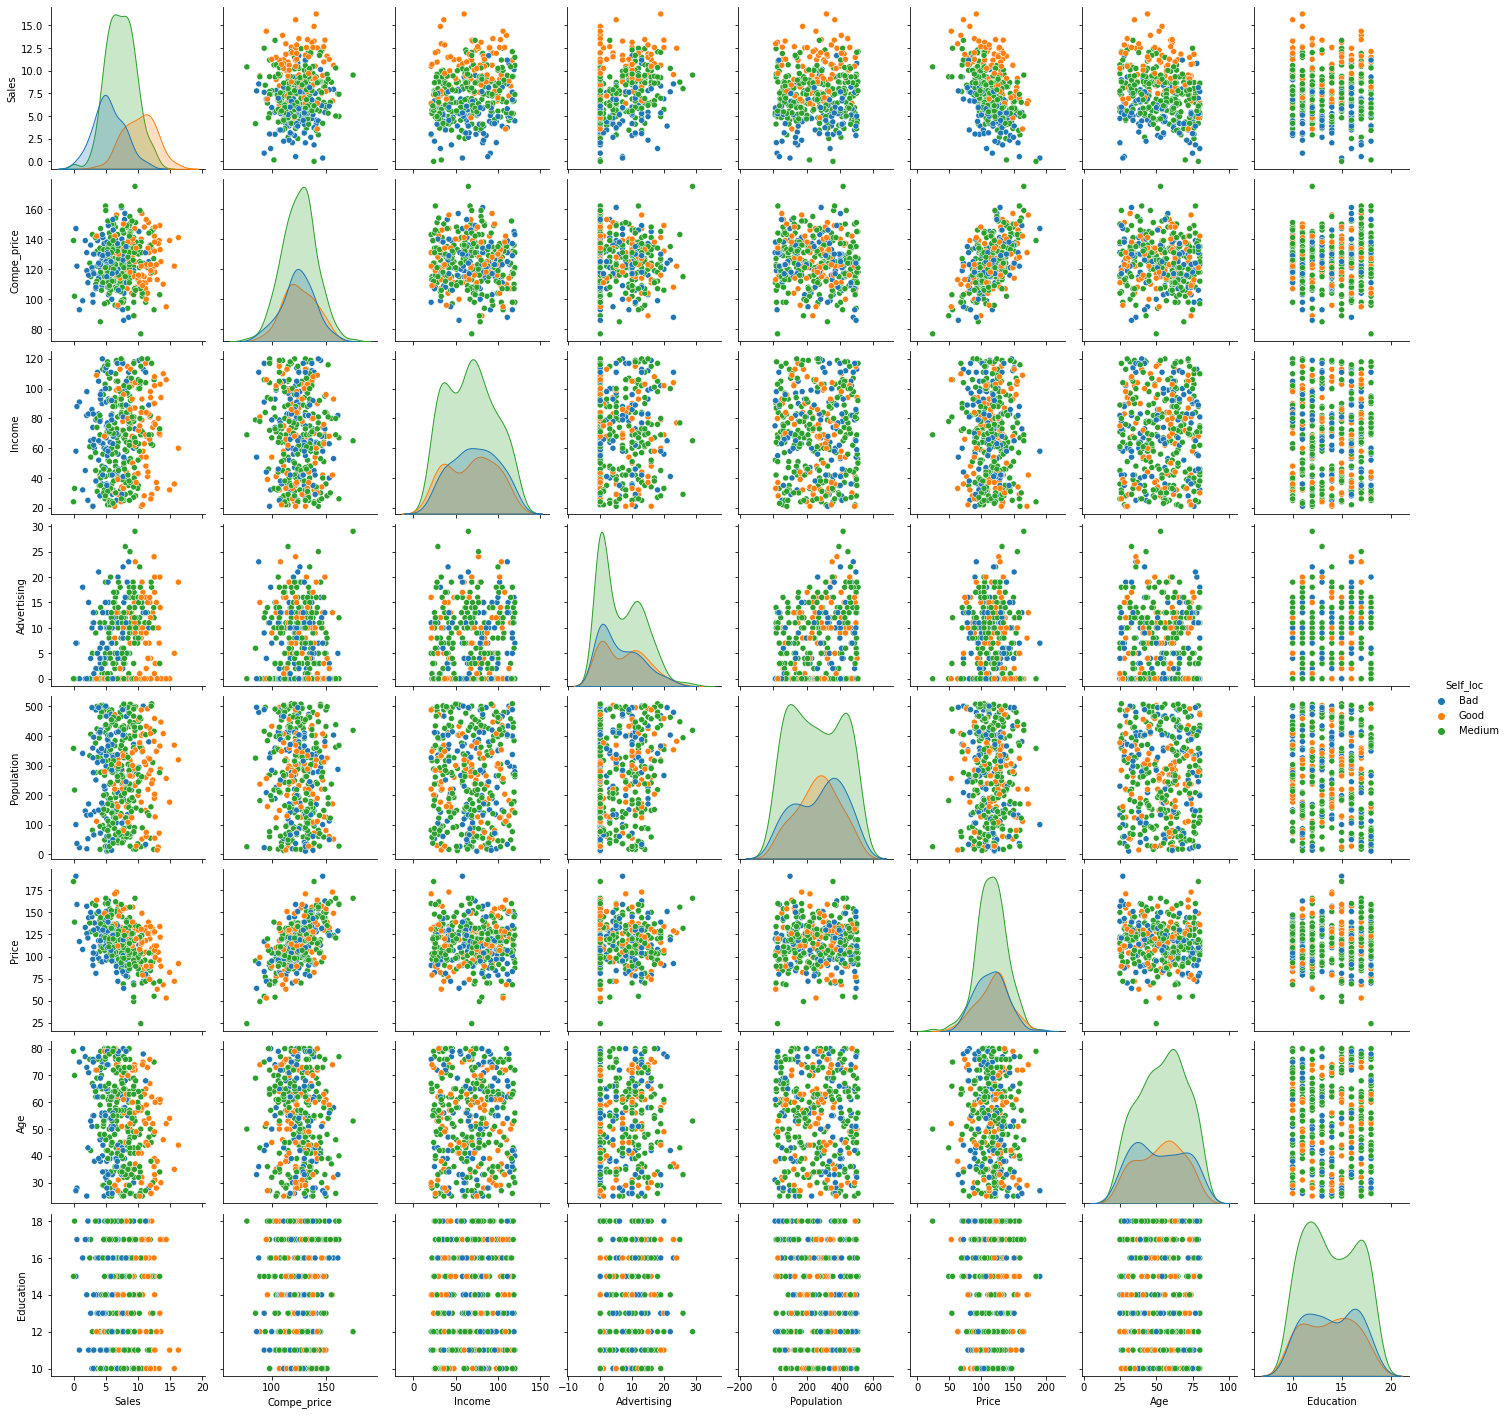

In [6]:
#EDA
sns.pairplot(data,hue='Self_loc')

In [7]:
data.isnull().any()

Sales          False
Compe_price    False
Income         False
Advertising    False
Population     False
Price          False
Self_loc       False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [8]:
#creating dummy variables
df=pd.get_dummies(data,columns=['Urban','US'],drop_first=True)

In [9]:
df

,Sales,Compe_price,Income,Advertising,Population,Price,Self_loc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [10]:
#change categorical variable to numeric
#There are many methods to replace categorical to numerical one : replace,get_dummies(),label_encoder and map function.
# we use map function

df['Self_loc']=df['Self_loc'].map({'Bad':0,'Medium':1,'Good':2})

In [11]:
df

,Sales,Compe_price,Income,Advertising,Population,Price,Self_loc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,1,55,11,0,1
397,7.41,162,26,12,368,159,1,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [12]:
df.Self_loc.unique()

array([0, 2, 1], dtype=int64)

In [13]:
df.Self_loc.value_counts()

1    219
0     96
2     85
Name: Self_loc, dtype: int64

In [14]:
colnames=list(df.columns)
colnames

['Sales',
 'Compe_price',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Self_loc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [15]:
x=pd.concat([df.iloc[:,0:6],df.iloc[:,7:]],axis=1)
y=df.iloc[:,6]

In [16]:
x

,Sales,Compe_price,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
4,4.15,141,64,3,340,128,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1
396,6.14,139,23,3,37,120,55,11,0,1
397,7.41,162,26,12,368,159,40,18,1,1
398,5.94,100,79,7,284,95,50,12,1,1


In [17]:
y

0      0
1      2
2      1
3      1
4      0
      ..
395    2
396    1
397    1
398    0
399    2
Name: Self_loc, Length: 400, dtype: int64

In [18]:
#splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

In [19]:
x_train

,Sales,Compe_price,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes
23,5.87,121,31,0,292,109,79,10,1,0
244,8.78,130,30,0,391,100,26,18,1,0
193,13.28,139,70,7,71,96,61,10,1,1
243,7.82,124,25,13,87,110,57,10,1,1
4,4.15,141,64,3,340,128,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
328,3.15,117,66,1,65,111,55,11,1,1
176,5.61,138,107,9,480,154,47,11,0,1
235,5.53,126,32,8,95,132,50,17,1,1
318,10.08,116,72,10,456,130,41,14,0,1


# Buliding Decision Tree classifier (CART) using Gini creteria

In [20]:
from sklearn.tree import DecisionTreeClassifier 
model= DecisionTreeClassifier(criterion='gini',max_depth=4)

In [21]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

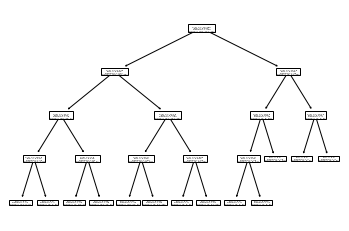

In [22]:
from sklearn import tree
tree.plot_tree(model);

In [23]:
list(x_train.columns)

['Sales',
 'Compe_price',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

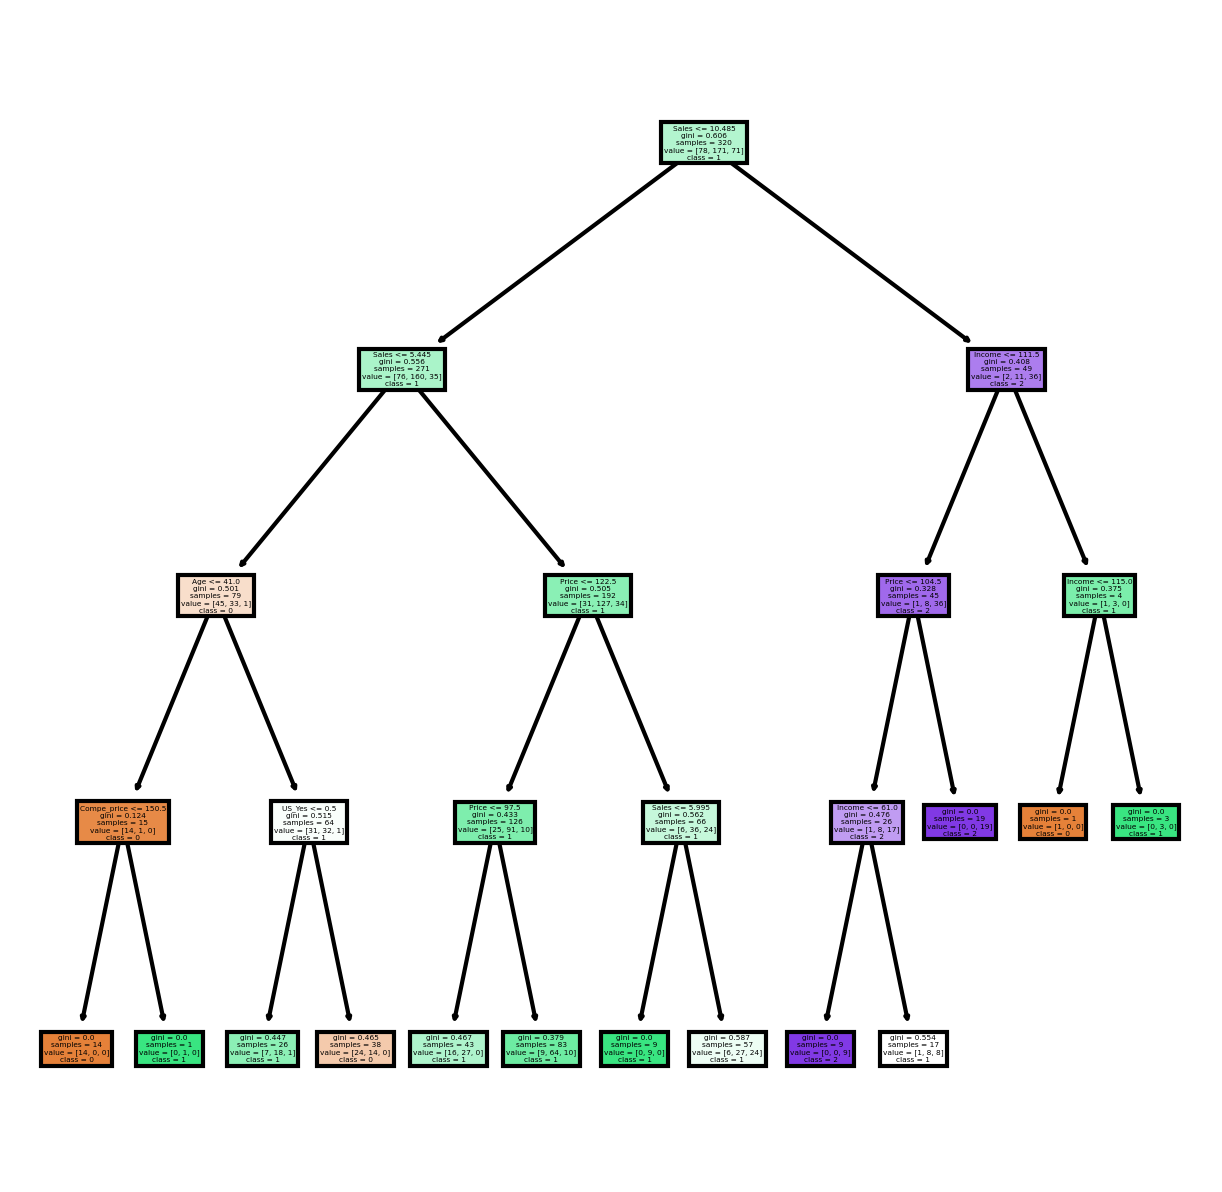

In [24]:
fn=['Sales',
 'Compe_price',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']
cn=['0','1','2']
f,ax=plt.subplots(1,1,figsize=(5,5),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [25]:
#prediction on test data
pred=model.predict(x_test)
pd.Series(pred).value_counts()

1    57
0    16
2     7
dtype: int64

In [26]:
pred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [27]:
#checking for accuracy of the testing model
from sklearn import metrics
metrics.accuracy_score(pred,y_test)

0.6375

In [28]:
#prediction on training data
pred2=model.predict(x_train)

In [29]:
#checking for accuracy of the training model
metrics.accuracy_score(pred2,y_train)

0.7

# Building decision tree classifier using Entropy criteria. C5.0 uses entropy

In [30]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [31]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [32]:
#prediction
predict3=model2.predict(x_train)

In [33]:
pd.Series(predict3).value_counts()

1    231
2     45
0     44
dtype: int64

In [34]:
pd.crosstab(y_train,predict3)

col_0,0,1,2
Self_loc,,,
0,29,48,1
1,14,149,8
2,1,34,36


In [35]:
#accuracy of the model
metrics.accuracy_score(predict3,y_train)

0.66875

In [36]:
#another method
import numpy as np
np.mean(predict3==y_train)

0.66875

In [37]:
#Comparing the accuracy of the model  [Gini creteria (CART) > entropy(C5.0)] 
#Gini creteria giving more  accuracy.

# Decision Tree Regression Example

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
df

,Sales,Compe_price,Income,Advertising,Population,Price,Self_loc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,1,55,11,0,1
397,7.41,162,26,12,368,159,1,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [53]:
array=df.values
x1=array[:,0:3]
y1=array[:,3] # Advertising- dependent variable

In [54]:
x1

array([[  9.5 , 138.  ,  73.  ],
       [ 11.22, 111.  ,  48.  ],
       [ 10.06, 113.  ,  35.  ],
       ...,
       [  7.41, 162.  ,  26.  ],
       [  5.94, 100.  ,  79.  ],
       [  9.71, 134.  ,  37.  ]])

In [55]:
y1

array([11., 16., 10.,  4.,  3., 13.,  0., 15.,  0.,  0.,  9.,  4.,  2.,
       11., 11.,  5.,  0., 13.,  0., 16.,  2., 12.,  6.,  0., 16.,  0.,
       11.,  0.,  0., 15.,  0., 16., 12., 13.,  0., 11.,  0.,  5.,  0.,
        0.,  0.,  0.,  0., 11.,  6.,  0., 14.,  0.,  0.,  0., 18.,  0.,
        3., 13., 13.,  5.,  0.,  0., 15.,  4., 19.,  0.,  0., 10., 12.,
        0.,  0., 14., 20.,  0., 15., 16.,  0., 10.,  5., 23., 10., 12.,
        1.,  0., 16.,  0.,  4.,  7.,  0.,  0.,  9.,  7.,  7.,  3.,  0.,
       11.,  0.,  0.,  5., 10., 10.,  5., 24.,  3., 11.,  0.,  0.,  0.,
        0.,  8.,  0.,  0.,  2.,  0.,  7., 12.,  5., 11.,  9.,  0.,  0.,
        0.,  2.,  8., 11., 10.,  5.,  0.,  0.,  0.,  2.,  3.,  3.,  7.,
       13.,  3.,  9.,  2.,  0., 14.,  0.,  0., 12., 10., 10.,  0.,  0.,
        7.,  0., 11.,  0.,  9.,  0., 13.,  8., 17.,  0.,  7., 10.,  0.,
        0.,  8.,  1.,  0.,  0.,  5.,  0.,  0.,  0.,  7., 17.,  0.,  0.,
       15., 12., 12., 13.,  5.,  0.,  0.,  9.,  0., 14.,  3., 15

In [56]:
#c5.0 cannot use for regression problems
#cart will be used for both classification and regression problems

# CART Model

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33, shuffle=True)

In [58]:
model4=DecisionTreeRegressor()
model4.fit(X_train,y_train)

DecisionTreeRegressor()

In [59]:
#Find the accuracy
model4.score(X_test,y_test)

-1.1913448910656017